<a href="https://colab.research.google.com/github/dhanyab123/convolutetheworld/blob/main/Male_vs_Female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Male VS Female

To build a convolution neural network which distinguishes between males and females with minimum accuracy of 60% on test data and run time of training below 6 minutes.

---

In [ ]:
# Install the kaggle library
!pip install -q kaggle 

# To upload the kaggle.json file
from google.colab import files
files.upload()

# Create kaggle folder
!mkdir ~/.kaggle

# Copy kaggle.json into folder kaggle
!cp kaggle.json ~/.kaggle

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json  

Saving kaggle.json to kaggle.json


In [ ]:
# To download the required dataset from kaggle
!kaggle datasets download -d ashwingupta3012/male-and-female-faces-dataset

100% 1.63G/1.63G [00:30<00:00, 84.2MB/s]
100% 1.63G/1.63G [00:30<00:00, 57.2MB/s]


In [ ]:
# Unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Male and Female face dataset/Female Faces/0 (1367).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1368).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1369).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (137).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1370).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1371).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1372).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1373).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1374).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1375).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1376).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1377).jpg  
  inflating: Male and Female face dataset/Female Faces/0 (1378).jpg  
  inflating: Male and Female face datase

In [ ]:
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data pre-processing

In [ ]:
# Assigning path for the dataset
DATASET_DATA_PATH = '/content/Male and Female face dataset'

In [ ]:
total_image_per = 2000
img_size = 200
labels = []
train_image = []
fem = 0
men = 0

for element in os.listdir(DATASET_DATA_PATH):
  for item in os.listdir(DATASET_DATA_PATH + '/' + element):
    if element == 'Female Faces':
      if fem >= total_image_per:
        continue
      fem += 1
      labels.append(0)
    elif element == 'Male Faces':
      if men >= total_image_per:
        continue
      men += 1
      labels.append(1)
    img = image.load_img(DATASET_DATA_PATH + '/' + element + '/' + str(item), target_size=(img_size, img_size))
    img = image.img_to_array(img)
    img = img/255.0
    train_image.append(img)

# Changing data into np arrays
label = np.array(labels)
X = np.array(train_image)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# Checking total length of dataset
len(X)

4000

(200, 200, 3)


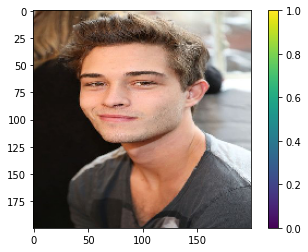

1


In [ ]:
# Checking shape of data
print(X[0].shape)

# Viewing the data and its resp. label
plt.imshow(X[3000])
plt.colorbar()
plt.show()

print(label[3000])

In [ ]:
# Checking the total number of possible labels
np.unique(label)

array([0, 1])

In [ ]:
# Splitting data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42)

In [ ]:
# Checking length of train and test sets
print(len(X_train), len(X_test))

3000 1000


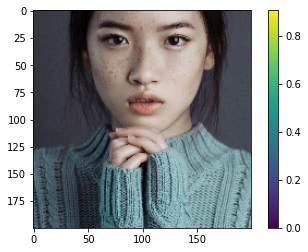

0


In [ ]:
# Viewing image from train set and its label
plt.imshow(X_train[31])
plt.colorbar()
plt.show()

print(y_train[31])

Creating the Convolution Neural Network

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu', input_shape = (200,200,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
# Adding to Loss function
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train, y_train, batch_size=70, epochs=3)

Epoch 1/3
43/43 [==============================] - 103s 2s/step - loss: 0.6359 - accuracy: 0.6283
Epoch 2/3
43/43 [==============================] - 101s 2s/step - loss: 0.5086 - accuracy: 0.7473
Epoch 3/3
43/43 [==============================] - 101s 2s/step - loss: 0.4275 - accuracy: 0.8160


In [ ]:
# Testing the model
model.evaluate(X_test, y_test)

32/32 [==============================] - 9s 290ms/step - loss: 0.3935 - accuracy: 0.8320


[0.39352333545684814, 0.8320000171661377]

Viewing output results

In [ ]:
distin = ['female', 'male']

# Predicting output for the test data
predictions = model.predict(X_test)

male


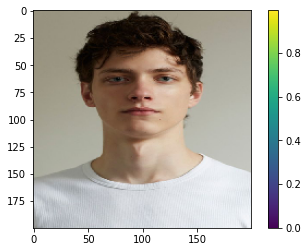

In [ ]:
# To get the prediction for the data and the input
num = 755

print(distin[np.argmax(predictions[num])])

plt.imshow(X_test[num])
plt.colorbar()
plt.show()

female


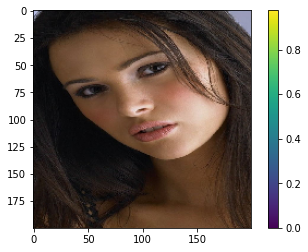

In [ ]:
num = 5

print(distin[np.argmax(predictions[num])])

plt.imshow(X_test[num])
plt.colorbar()
plt.show()